# Total Variation

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

## implementation of total variation model

In [2]:
from total_variation import TotalVariation

### try the implemented total variation model

load a image

In [3]:
img = cv2.cvtColor(
    cv2.resize(cv2.imread('insects.jpeg', True), None, fx=0.25, fy=0.25),
    cv2.COLOR_BGR2RGB
) / 255.

In [4]:
img.shape

(756, 1008, 3)

In [5]:
%%time
tv = TotalVariation(lambd = 0.5, saturation = True, extended_output = True)
smoothed = np.empty(img.shape)
smoothed[:,:,0], obj = tv.transform(img[:,:,0])

CPU times: user 17.3 s, sys: 3.11 s, total: 20.4 s
Wall time: 10.5 s


objective function

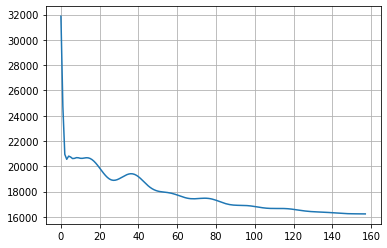

In [6]:
plt.plot(obj[:])
plt.grid(True)

In [7]:
%%time
tv = TotalVariation(lambd = 0.5, saturation = True, extended_output = False)
smoothed[:,:,1], _ = tv.transform(img[:,:,1])
smoothed[:,:,2], _ = tv.transform(img[:,:,2])

CPU times: user 27.9 s, sys: 4.52 s, total: 32.4 s
Wall time: 16.5 s


result

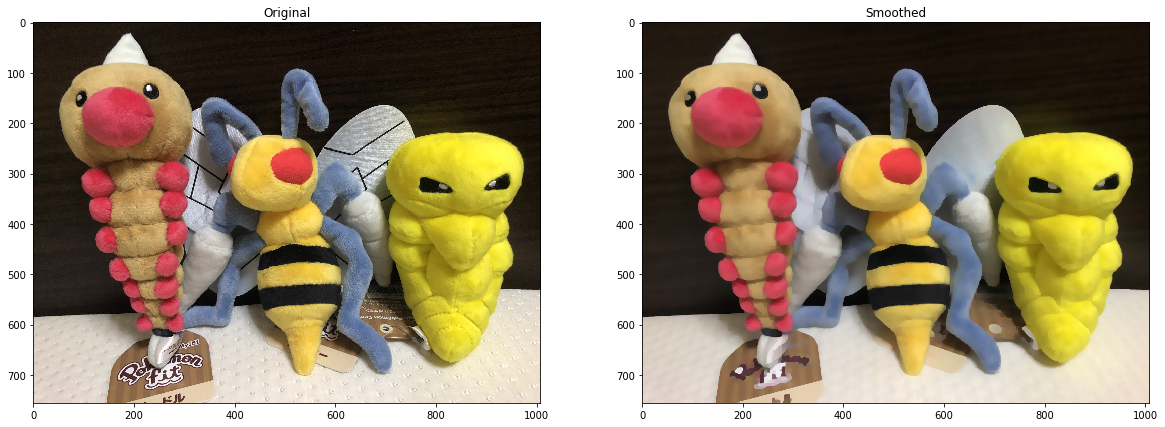

In [8]:
plt.figure(figsize=(20, 10))
plt.subplot(1,2,1)
plt.imshow(img)
plt.grid(False)
plt.title('Original')
plt.subplot(1,2,2)
plt.imshow(smoothed)
plt.grid(False)
plt.title('Smoothed')
plt.savefig('smoothed_insects.png')
plt.show()